<a href="https://colab.research.google.com/github/nyayuchika/pcd-coursework/blob/master/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dengan input citra

(92, 92)


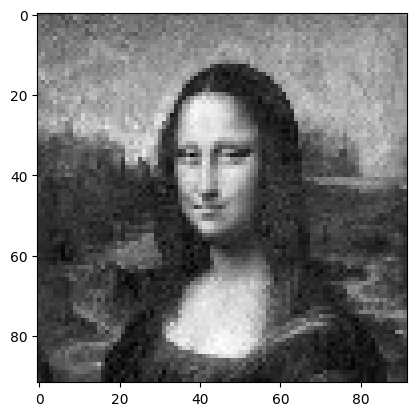

In [217]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('upsampling.jpg',0)
plt.imshow(img, cmap='gray')
print(img.shape)

##Upsampling

In [218]:
#Generate Matrix
import numpy as np
dimension = img.shape
m = dimension[0]
n = dimension[1]
print(f"Banyak baris {m}")
print(f"Banyak kolom {n}")
a = img
print(a)

Banyak baris 92
Banyak kolom 92
[[ 87  87  95 ... 126 122 136]
 [105 100 108 ... 127 114 121]
 [109 118  97 ... 129 113 115]
 ...
 [ 44  39  26 ...  49  59  55]
 [ 48  32  31 ...  58  64  60]
 [ 56  42  30 ...  70  67  60]]


###Nearest Neighbor

In [229]:
print(a)

[[ 87  87  95 ... 126 122 136]
 [105 100 108 ... 127 114 121]
 [109 118  97 ... 129 113 115]
 ...
 [ 44  39  26 ...  49  59  55]
 [ 48  32  31 ...  58  64  60]
 [ 56  42  30 ...  70  67  60]]


In [230]:
def floor(x):
  if x>=0:
    return int(x)
  else:
    return int(x)-1

In [231]:
def minimum(x, y):
  if x < y:
    return x
  else:
    return y

def minimum2(x):
  if len(x)==0:
    return 0
  min_val=x[0]
  for v in x[1:]:
    if v<min_val:
      min_val=v
  return min_val

In [234]:
scale_factor = 2

def nn_upsampling(matriks, scale_factor):
  m, n = matriks.shape
  m_new = m * scale_factor
  n_new = n * scale_factor
  a_new = np.zeros((m_new,n_new))
  for i in range(m_new):
    for j in range(n_new):
      i2 = i/scale_factor
      j2 = j/scale_factor

      # baris
      row_floor = int(floor(i2))
      row_ceil = minimum(m-1, row_floor+1)
      row_df = i2-row_floor
      row_dc = row_ceil-i2
      if row_df < row_dc:
        rows = [row_floor]
      elif row_df > row_dc:
        rows = [row_ceil]
      else: #sama
        rows = [row_floor, row_ceil]

      #kolom
      col_floor = int(floor(j2))
      col_ceil = minimum(n-1, col_floor+1)
      col_df = j2-col_floor
      col_dc = col_ceil-j2
      if col_df < col_dc:
        cols = [col_floor]
      elif col_df > col_dc:
        cols = [col_ceil]
      else: #sama
        cols = [col_floor, col_ceil]

      kandidat = []
      for r in rows:
        for c in cols:
          kandidat.append(a[r, c])
      a_new[i,j] = minimum2(kandidat)
  return a_new

a_nn = nn_upsampling(a, scale_factor)
print(f"Matriks awal: \n{a}\n")
print(f"Matriks setelah NN upsampling: \n{a_nn}")
print(a_nn.shape)

Matriks awal: 
[[ 87  87  95 ... 126 122 136]
 [105 100 108 ... 127 114 121]
 [109 118  97 ... 129 113 115]
 ...
 [ 44  39  26 ...  49  59  55]
 [ 48  32  31 ...  58  64  60]
 [ 56  42  30 ...  70  67  60]]

Matriks setelah NN upsampling: 
[[ 87.  87.  87. ... 122. 136. 136.]
 [ 87.  87.  87. ... 114. 121. 121.]
 [105. 100. 100. ... 114. 121. 121.]
 ...
 [ 48.  32.  32. ...  60.  60.  60.]
 [ 56.  42.  42. ...  60.  60.  60.]
 [ 56.  42.  42. ...  60.  60.  60.]]
(184, 184)


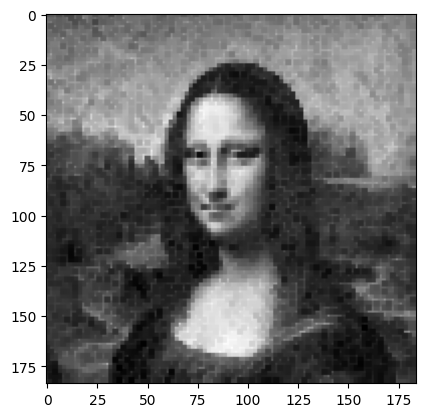

In [233]:
plt.imshow(a_nn, cmap="gray")

###Bilinear

In [235]:
print(a)

[[ 87  87  95 ... 126 122 136]
 [105 100 108 ... 127 114 121]
 [109 118  97 ... 129 113 115]
 ...
 [ 44  39  26 ...  49  59  55]
 [ 48  32  31 ...  58  64  60]
 [ 56  42  30 ...  70  67  60]]


In [236]:
scale_factor = 2

def bilinear_upsampling(matriks, scale_factor):
  m, n = matriks.shape
  m_new = m * scale_factor
  n_new = n * scale_factor
  a_new = np.zeros((m_new,n_new))
  for i in range(m_new):
    for j in range(n_new):
      i2 = i / scale_factor
      j2 = j / scale_factor

      # Cari floor & ceil untuk baris dan kolom
      r0 = int(floor(i2))
      c0 = int(floor(j2))
      r1 = min(m-1, r0+1)
      c1 = min(n-1, c0+1)

      # Hitung jarak pecahan
      dy = i2 - r0
      dx = j2 - c0

      # Ambil 4 tetangga
      v00 = a[r0, c0]  # kiri-bawah
      v01 = a[r0, c1]  # kanan-bawah
      v10 = a[r1, c0]  # kiri-atas
      v11 = a[r1, c1]  # kanan-atas

      # Bilinear interpolation
      a_new[i, j] = (1-dx)*(1-dy)*v00 + dx*(1-dy)*v01 + (1-dx)*dy*v10 + dx*dy*v11
  return a_new

a_bilinear = bilinear_upsampling(a, scale_factor)
print(f"Matriks awal: \n{a}\n")
print(f"Matriks setelah bilinear upsampling: \n{a_bilinear}")
print(a_bilinear.shape)

Matriks awal: 
[[ 87  87  95 ... 126 122 136]
 [105 100 108 ... 127 114 121]
 [109 118  97 ... 129 113 115]
 ...
 [ 44  39  26 ...  49  59  55]
 [ 48  32  31 ...  58  64  60]
 [ 56  42  30 ...  70  67  60]]

Matriks setelah bilinear upsampling: 
[[ 87.    87.    87.   ... 129.   136.   136.  ]
 [ 96.    94.75  93.5  ... 123.25 128.5  128.5 ]
 [105.   102.5  100.   ... 117.5  121.   121.  ]
 ...
 [ 52.    44.5   37.   ...  62.75  60.    60.  ]
 [ 56.    49.    42.   ...  63.5   60.    60.  ]
 [ 56.    49.    42.   ...  63.5   60.    60.  ]]
(184, 184)


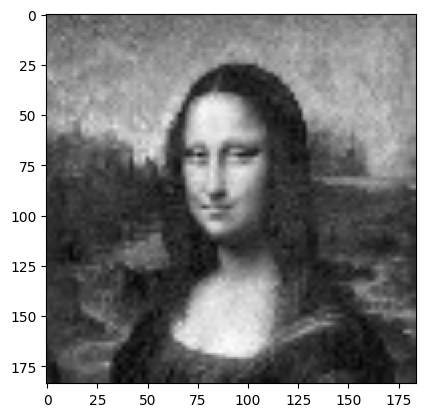

In [237]:
plt.imshow(a_bilinear, cmap="gray")

###Bicubic

In [238]:
print(a)

[[ 87  87  95 ... 126 122 136]
 [105 100 108 ... 127 114 121]
 [109 118  97 ... 129 113 115]
 ...
 [ 44  39  26 ...  49  59  55]
 [ 48  32  31 ...  58  64  60]
 [ 56  42  30 ...  70  67  60]]


In [239]:
def cubic_weight(t):
    t = abs(t)
    if t <= 1:
        return (1.5 * t**3 - 2.5 * t**2 + 1)
    elif t < 2:
        return (-0.5 * t**3 + 2.5 * t**2 - 4*t + 2)
    else:
        return 0

scale_factor = 2
def bicubic_upsampling(a, scale_factor):
  m, n = a.shape  # asumsi 'a' sudah ada
  m_new = m * scale_factor
  n_new = n * scale_factor
  a_new = np.zeros((m_new,n_new))

  for i in range(m_new):
    for j in range(n_new):
      # Koordinat di gambar lama
      i2 = i / scale_factor
      j2 = j / scale_factor

      i0 = int(floor(i2))
      j0 = int(floor(j2))

      # Loop 4x4 tetangga
      val = 0
      wsum = 0
      for di in range(-1, 3):  # -1,0,1,2
          for dj in range(-1, 3):
              r = min(max(i0+di, 0), m-1)  # clamp ke batas matriks
              c = min(max(j0+dj, 0), n-1)
              w = cubic_weight(i2 - (i0+di)) * cubic_weight(j2 - (j0+dj))
              val += a[r,c] * w
              wsum += w
      if wsum != 0:
          a_new[i,j] = val / wsum
  return a_new

a_bicubic = bicubic_upsampling(a, scale_factor)
print(f"Matriks awal: \n{a}\n")
print(f"Matriks setelah bicubic upsampling: \n{a_bicubic}")
print(a_bicubic.shape)

Matriks awal: 
[[ 87  87  95 ... 126 122 136]
 [105 100 108 ... 127 114 121]
 [109 118  97 ... 129 113 115]
 ...
 [ 44  39  26 ...  49  59  55]
 [ 48  32  31 ...  58  64  60]
 [ 56  42  30 ...  70  67  60]]

Matriks setelah bicubic upsampling: 
[[ 87.          86.5         87.         ... 128.75       136.
  136.875     ]
 [ 95.75        93.44921875  92.375      ... 122.94921875 128.875
  129.55078125]
 [105.         102.         100.         ... 116.6875     121.
  121.4375    ]
 ...
 [ 52.25        44.765625    36.5625     ...  63.140625    60.3125
   59.96875   ]
 [ 56.          49.75        42.         ...  63.3125      60.
   59.5625    ]
 [ 56.5         50.35546875  42.625      ...  63.37109375  60.
   59.55078125]]
(184, 184)


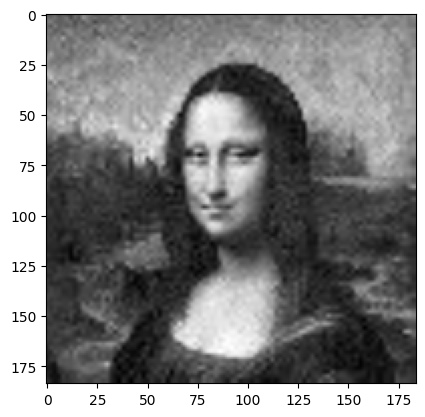

In [240]:
plt.imshow(a_bicubic, cmap="gray")

###Conclusion

In [241]:
print(f"""The result from downsampling method:
Before downsampling: \n{a} \n\nAfter downsampling:
1. Max: \n{a_nn} \n\n2. Median: \n{a_bilinear} \n\n3. Mean: \n{a_bicubic}""")

The result from downsampling method:
Before downsampling: 
[[ 87  87  95 ... 126 122 136]
 [105 100 108 ... 127 114 121]
 [109 118  97 ... 129 113 115]
 ...
 [ 44  39  26 ...  49  59  55]
 [ 48  32  31 ...  58  64  60]
 [ 56  42  30 ...  70  67  60]] 

After downsampling:
1. Max: 
[[ 87.  87.  87. ... 122. 136. 136.]
 [ 87.  87.  87. ... 114. 121. 121.]
 [105. 100. 100. ... 114. 121. 121.]
 ...
 [ 48.  32.  32. ...  60.  60.  60.]
 [ 56.  42.  42. ...  60.  60.  60.]
 [ 56.  42.  42. ...  60.  60.  60.]] 

2. Median: 
[[ 87.    87.    87.   ... 129.   136.   136.  ]
 [ 96.    94.75  93.5  ... 123.25 128.5  128.5 ]
 [105.   102.5  100.   ... 117.5  121.   121.  ]
 ...
 [ 52.    44.5   37.   ...  62.75  60.    60.  ]
 [ 56.    49.    42.   ...  63.5   60.    60.  ]
 [ 56.    49.    42.   ...  63.5   60.    60.  ]] 

3. Mean: 
[[ 87.          86.5         87.         ... 128.75       136.
  136.875     ]
 [ 95.75        93.44921875  92.375      ... 122.94921875 128.875
  129.55078125]
 [1

The results from downsampling methods
Original image


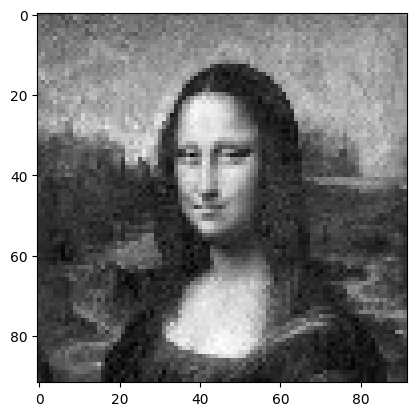



1. NN


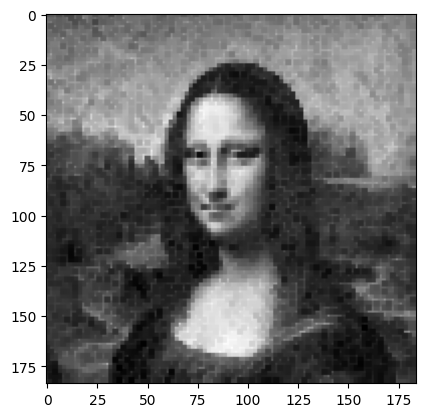



2. Bilinear


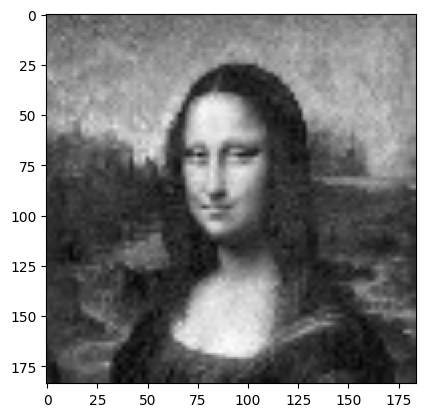



3. Bicubic


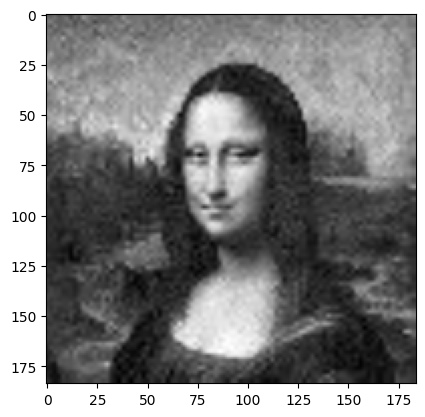

In [242]:
print("The results from downsampling methods")
print("Original image")
plt.show(plt.imshow(a, cmap="gray"))
print("\n\n1. NN")
plt.show(plt.imshow(a_nn, cmap="gray"))
print("\n\n2. Bilinear")
plt.show(plt.imshow(a_bilinear, cmap="gray"))
print("\n\n3. Bicubic")
plt.show(plt.imshow(a_bicubic, cmap="gray"))

##Downsampling

(512, 512)


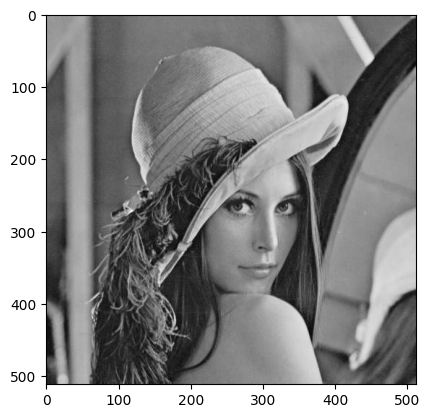

In [224]:
import cv2
import matplotlib.pyplot as plt

img2 = cv2.imread('downsampling.jpg', 0)
plt.imshow(img2, cmap='gray')
print(img2.shape)

In [171]:
#Generate Matrix
import numpy as np
dimension = img2.shape
m = dimension[0]
n = dimension[1]
print(f"Banyak baris {m}")
print(f"Banyak kolom {n}")
b = img2
print(b)

Banyak baris 512
Banyak kolom 512
[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]


###Max

In [172]:
print(b)
print(b.shape)

[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]
(512, 512)


In [173]:
def max_downsampling(matriks, block_size):
    rows, cols = block_size
    max_matriks = []

    for i in range(0, matriks.shape[0], rows):
        row_list = []
        for j in range(0, matriks.shape[1], cols):
            block = matriks[i:i+rows, j:j+cols]
            block_flat = block.flatten()
            max_val = block_flat[0]
            for val in block_flat:
                if val > max_val:
                    max_val = val
            row_list.append(np.max(block))
        max_matriks.append(row_list)

    return np.array(max_matriks)

print("Matriks asli:")
print(b)

print("\nMatriks Downsampling Max:")
b_max = max_downsampling(b, (2,2))
print(b_max)

Matriks asli:
[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]

Matriks Downsampling Max:
[[162 161 159 ... 174 173 158]
 [163 162 160 ... 176 176 158]
 [163 161 160 ... 173 171 151]
 ...
 [ 51  53  52 ...  90  93  94]
 [ 47  50  49 ...  99 102 103]
 [ 45  54  54 ... 100 105 109]]


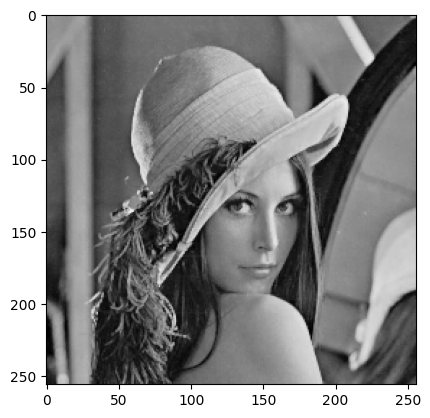

In [174]:
plt.imshow(b_max, cmap="gray")

###Median

In [175]:
print(b)

[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]


In [176]:
def median_downsampling(matriks, block_size):
    rows, cols = block_size
    median_matriks = []

    for i in range(0, matriks.shape[0], rows):
        row_list = []
        for j in range(0, matriks.shape[1], cols):
            block = matriks[i:i+rows, j:j+cols]
            block_flat = np.sort(block.flatten())   # urutkan 1D

            n = len(block_flat)
            if n % 2 == 1:   # jumlah ganjil → ambil tengah langsung
                med_val = block_flat[n // 2]
            else:            # jumlah genap → rata-rata dua nilai tengah
                med_val = (block_flat[n//2 - 1] + block_flat[n//2]) / 2

            row_list.append(int(med_val))  # ubah ke int kalau mau konsisten
        median_matriks.append(row_list)

    return np.array(median_matriks)

print("Matriks asli:")
print(b)

print("\nMatriks Downsampling Median:")
b_median = median_downsampling(b, (2,2))
print(b_median)

Matriks asli:
[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]

Matriks Downsampling Median:
[[ 34  32  31 ...  44  43  15]
 [ 35  33  32 ...  43  42  13]
 [ 34  32  31 ...  33  26 114]
 ...
 [ 49  52  51 ...  83  91  92]
 [ 45  49  49 ...  94  99  98]
 [ 43  51  51 ...  99 102 107]]


/tmp/ipython-input-1272177037.py:15: RuntimeWarning: overflow encountered in scalar add
  med_val = (block_flat[n//2 - 1] + block_flat[n//2]) / 2


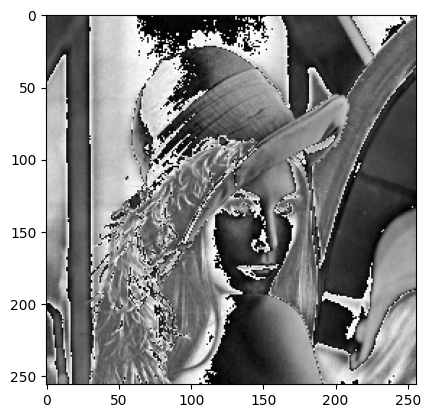

In [177]:
plt.imshow(b_median, cmap="gray")

###Mean

In [178]:
print(b)
print(b.shape)

[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]
(512, 512)


In [179]:
def mean_downsampling(matriks, block_size):
    rows, cols = block_size
    mean_matriks = []

    for i in range(0, matriks.shape[0], rows):
        row_list = []
        for j in range(0, matriks.shape[1], cols):
            block = matriks[i:i+rows, j:j+cols]
            block_flat = block.flatten()
            mean_val = sum(block_flat) / len(block_flat)
            row_list.append(mean_val)
        mean_matriks.append(row_list)

    return np.array(mean_matriks)

print("Matriks asli:")
print(b)

print("\nMatriks Downsampling Mean:")
b_mean = mean_downsampling(b, (2,2))
print(b_mean)

Matriks asli:
[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]]

Matriks Downsampling Mean:


/tmp/ipython-input-2620263322.py:10: RuntimeWarning: overflow encountered in scalar add
  mean_val = sum(block_flat) / len(block_flat)


[[33.75 32.   31.   ... 43.25 43.   15.5 ]
 [34.75 33.   32.   ... 42.5  42.25 14.25]
 [34.   32.   31.5  ... 32.75 23.75 51.75]
 ...
 [49.5  52.   51.25 ... 19.25 27.25 28.  ]
 [44.75 49.5  48.75 ... 29.75 35.25 34.  ]
 [43.   51.75 51.25 ... 34.75 38.5  43.  ]]


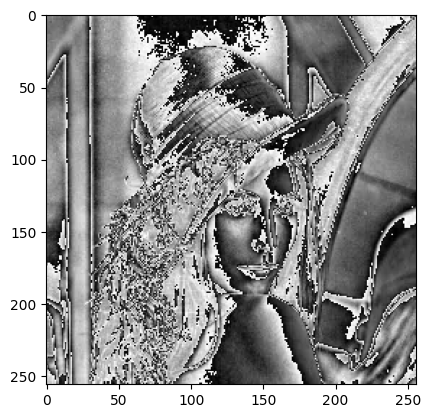

In [180]:
plt.imshow(b_mean, cmap="gray")

###Conclusion

In [181]:
print(f"""The result from downsampling method:
Before downsampling: \n{b} \n\nAfter downsampling:
1. Max: \n{b_max} \n\n2. Median: \n{b_median} \n\n3. Mean: \n{b_mean}""")

The result from downsampling method:
Before downsampling: 
[[162 161 160 ... 171 154 129]
 [162 162 161 ... 173 158 133]
 [163 162 161 ... 171 155 128]
 ...
 [ 42  45  49 ... 102 103 103]
 [ 41  45  50 ... 105 107 109]
 [ 41  45  51 ... 102 105 107]] 

After downsampling:
1. Max: 
[[162 161 159 ... 174 173 158]
 [163 162 160 ... 176 176 158]
 [163 161 160 ... 173 171 151]
 ...
 [ 51  53  52 ...  90  93  94]
 [ 47  50  49 ...  99 102 103]
 [ 45  54  54 ... 100 105 109]] 

2. Median: 
[[ 34  32  31 ...  44  43  15]
 [ 35  33  32 ...  43  42  13]
 [ 34  32  31 ...  33  26 114]
 ...
 [ 49  52  51 ...  83  91  92]
 [ 45  49  49 ...  94  99  98]
 [ 43  51  51 ...  99 102 107]] 

3. Mean: 
[[33.75 32.   31.   ... 43.25 43.   15.5 ]
 [34.75 33.   32.   ... 42.5  42.25 14.25]
 [34.   32.   31.5  ... 32.75 23.75 51.75]
 ...
 [49.5  52.   51.25 ... 19.25 27.25 28.  ]
 [44.75 49.5  48.75 ... 29.75 35.25 34.  ]
 [43.   51.75 51.25 ... 34.75 38.5  43.  ]]


The results from downsampling methods
Original image


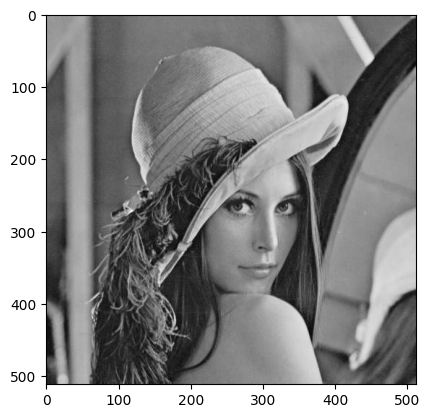



1. Max


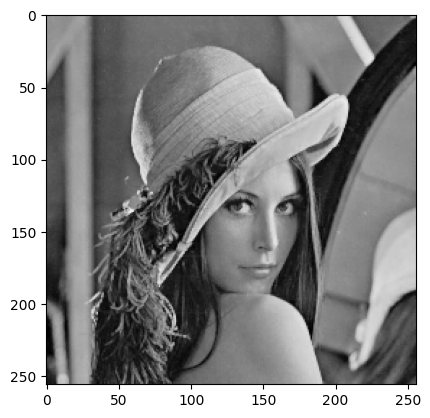



2. Median


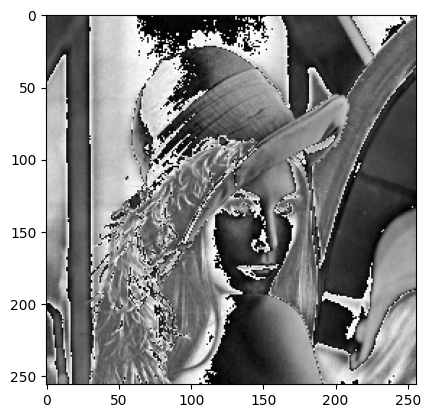



3. Mean


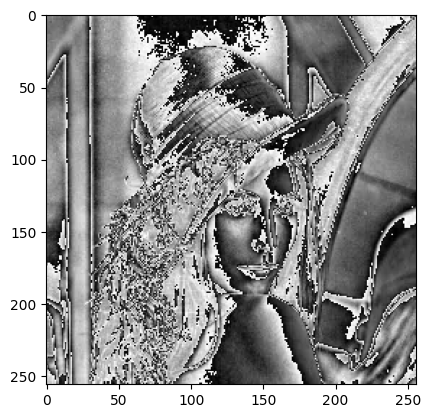

In [182]:
print("The results from downsampling methods")
print("Original image")
plt.show(plt.imshow(b, cmap="gray"))
print("\n\n1. Max")
plt.show(plt.imshow(b_max, cmap="gray"))
print("\n\n2. Median")
plt.show(plt.imshow(b_median, cmap="gray"))
print("\n\n3. Mean")
plt.show(plt.imshow(b_mean, cmap="gray"))

#Hanya fokus menggunakan matriks

##Upsampling

In [189]:
#Generate Matrix
import numpy as np
m = 0
n = 0
m = input("Masukkan banyak baris = ")
n = input("Masukkan banyak kolom = ")
print(f"Banyak baris {m}")
print(f"Banyak kolom {n}")
m = int(m)
n = int(n)
a = np.random.randint(10, size=(m,n))
print(a)

Masukkan banyak baris = 2
Masukkan banyak kolom = 2
Banyak baris 2
Banyak kolom 2
[[3 5]
 [1 9]]


###Nearest Neighbor

In [190]:
print(a)

[[3 5]
 [1 9]]


In [191]:
def floor(x):
  if x>=0:
    return int(x)
  else:
    return int(x)-1

In [192]:
def minimum(x, y):
  if x < y:
    return x
  else:
    return y

def minimum2(x):
  if len(x)==0:
    return 0
  min_val=x[0]
  for v in x[1:]:
    if v<min_val:
      min_val=v
  return min_val

In [193]:
scale_factor = 2

def nn_upsampling(matriks, scale_factor):
  m, n = matriks.shape
  m_new = m * scale_factor
  n_new = n * scale_factor
  a_new = np.zeros((m_new,n_new))
  for i in range(m_new):
    for j in range(n_new):
      i2 = i/scale_factor
      j2 = j/scale_factor

      # baris
      row_floor = int(floor(i2))
      row_ceil = minimum(m-1, row_floor+1)
      row_df = i2-row_floor
      row_dc = row_ceil-i2
      if row_df < row_dc:
        rows = [row_floor]
      elif row_df > row_dc:
        rows = [row_ceil]
      else: #sama
        rows = [row_floor, row_ceil]

      #kolom
      col_floor = int(floor(j2))
      col_ceil = minimum(n-1, col_floor+1)
      col_df = j2-col_floor
      col_dc = col_ceil-j2
      if col_df < col_dc:
        cols = [col_floor]
      elif col_df > col_dc:
        cols = [col_ceil]
      else: #sama
        cols = [col_floor, col_ceil]

      kandidat = []
      for r in rows:
        for c in cols:
          kandidat.append(a[r, c])
      a_new[i,j] = minimum2(kandidat)
  return a_new

a_nn = nn_upsampling(a, scale_factor)
print(f"Matriks awal: \n{a}\n")
print(f"Matriks setelah upsampling: \n{a_nn}")
print(a_nn.shape)

Matriks awal: 
[[3 5]
 [1 9]]

Matriks setelah upsampling: 
[[3. 3. 5. 5.]
 [1. 1. 5. 5.]
 [1. 1. 9. 9.]
 [1. 1. 9. 9.]]
(4, 4)


###Bilinear

In [194]:
print(a)

[[3 5]
 [1 9]]


In [195]:
scale_factor = 2

def bilinear_upsampling(matriks, scale_factor):
  m, n = matriks.shape
  m_new = m * scale_factor
  n_new = n * scale_factor
  a_new = np.zeros((m_new,n_new))
  for i in range(m_new):
    for j in range(n_new):
      i2 = i / scale_factor
      j2 = j / scale_factor

      # Cari floor & ceil untuk baris dan kolom
      r0 = int(floor(i2))
      c0 = int(floor(j2))
      r1 = min(m-1, r0+1)
      c1 = min(n-1, c0+1)

      # Hitung jarak pecahan
      dy = i2 - r0
      dx = j2 - c0

      # Ambil 4 tetangga
      v00 = a[r0, c0]  # kiri-bawah
      v01 = a[r0, c1]  # kanan-bawah
      v10 = a[r1, c0]  # kiri-atas
      v11 = a[r1, c1]  # kanan-atas

      # Bilinear interpolation
      a_new[i, j] = (1-dx)*(1-dy)*v00 + dx*(1-dy)*v01 + (1-dx)*dy*v10 + dx*dy*v11
  return a_new

a_bilinear = bilinear_upsampling(a, scale_factor)
print(f"Matriks awal: \n{a}\n")
print(f"Matriks setelah bilinear upsampling: \n{a_bilinear}")
print(a_bilinear.shape)

Matriks awal: 
[[3 5]
 [1 9]]

Matriks setelah bilinear upsampling: 
[[3.  4.  5.  5. ]
 [2.  4.5 7.  7. ]
 [1.  5.  9.  9. ]
 [1.  5.  9.  9. ]]
(4, 4)


###Bicubic

In [196]:
print(a)

[[3 5]
 [1 9]]


In [197]:
def cubic_weight(t):
    t = abs(t)
    if t <= 1:
        return (1.5 * t**3 - 2.5 * t**2 + 1)
    elif t < 2:
        return (-0.5 * t**3 + 2.5 * t**2 - 4*t + 2)
    else:
        return 0

scale_factor = 2
def bicubic_upsampling(a, scale_factor):
  m, n = a.shape  # asumsi 'a' sudah ada
  m_new = m * scale_factor
  n_new = n * scale_factor
  a_new = np.zeros((m_new,n_new))

  for i in range(m_new):
    for j in range(n_new):
      # Koordinat di gambar lama
      i2 = i / scale_factor
      j2 = j / scale_factor

      i0 = int(floor(i2))
      j0 = int(floor(j2))

      # Loop 4x4 tetangga
      val = 0
      wsum = 0
      for di in range(-1, 3):  # -1,0,1,2
          for dj in range(-1, 3):
              r = min(max(i0+di, 0), m-1)  # clamp ke batas matriks
              c = min(max(j0+dj, 0), n-1)
              w = cubic_weight(i2 - (i0+di)) * cubic_weight(j2 - (j0+dj))
              val += a[r,c] * w
              wsum += w
      if wsum != 0:
          a_new[i,j] = val / wsum
  return a_new

a_bicubic = bicubic_upsampling(a, scale_factor)
print(f"Matriks awal: \n{a}\n")
print(f"Matriks setelah bicubic upsampling: \n{a_bicubic}")
print(a_bicubic.shape)

Matriks awal: 
[[3 5]
 [1 9]]

Matriks setelah bicubic upsampling: 
[[3.        4.        5.        5.125    ]
 [2.        4.5       7.        7.3125   ]
 [1.        5.        9.        9.5      ]
 [0.875     5.0625    9.25      9.7734375]]
(4, 4)


###Conclusion

In [198]:
print(f"""The result from downsampling method:
Before upsampling: \n{a} \n\nAfter upsampling:
1. Nearest Neighbor: \n{a_nn} \n\n2. Bilinear: \n{a_bilinear} \n\n3. Bicubic: \n{a_bicubic}""")

The result from downsampling method:
Before upsampling: 
[[3 5]
 [1 9]] 

After upsampling:
1. Nearest Neighbor: 
[[3. 3. 5. 5.]
 [1. 1. 5. 5.]
 [1. 1. 9. 9.]
 [1. 1. 9. 9.]] 

2. Bilinear: 
[[3.  4.  5.  5. ]
 [2.  4.5 7.  7. ]
 [1.  5.  9.  9. ]
 [1.  5.  9.  9. ]] 

3. Bicubic: 
[[3.        4.        5.        5.125    ]
 [2.        4.5       7.        7.3125   ]
 [1.        5.        9.        9.5      ]
 [0.875     5.0625    9.25      9.7734375]]


##Downsampling

In [199]:
#Generate Matrix
import numpy as np
m = 0
n = 0
m = input("Masukkan banyak baris = ")
n = input("Masukkan banyak kolom = ")
print(f"Banyak baris {m}")
print(f"Banyak kolom {n}")
m = int(m)
n = int(n)
b = np.random.randint(10, size=(m,n))
print(b)

Masukkan banyak baris = 6
Masukkan banyak kolom = 6
Banyak baris 6
Banyak kolom 6
[[6 1 4 7 1 7]
 [2 4 9 2 7 1]
 [6 8 3 5 0 7]
 [1 0 9 5 2 7]
 [0 5 6 8 0 7]
 [1 7 6 8 2 4]]


###Max

In [200]:
print(b)
print(b.shape)

[[6 1 4 7 1 7]
 [2 4 9 2 7 1]
 [6 8 3 5 0 7]
 [1 0 9 5 2 7]
 [0 5 6 8 0 7]
 [1 7 6 8 2 4]]
(6, 6)


In [201]:
def max_downsampling(matriks, block_size=(2,2)):
    rows, cols = block_size
    max_matriks = []

    for i in range(0, matriks.shape[0], rows):
        row_list = []
        for j in range(0, matriks.shape[1], cols):
            block = matriks[i:i+rows, j:j+cols]
            block_flat = block.flatten()
            max_val = block_flat[0]
            for val in block_flat:
                if val > max_val:
                    max_val = val
            row_list.append(np.max(block))
        max_matriks.append(row_list)

    return np.array(max_matriks)

print("Matriks asli:")
print(b)

print("\nMatriks Downsampling Max:")
print(max_downsampling(b, (2,2)))
b_max = max_downsampling(b, (2,2))

Matriks asli:
[[6 1 4 7 1 7]
 [2 4 9 2 7 1]
 [6 8 3 5 0 7]
 [1 0 9 5 2 7]
 [0 5 6 8 0 7]
 [1 7 6 8 2 4]]

Matriks Downsampling Max:
[[6 9 7]
 [8 9 7]
 [7 8 7]]


###Median

In [202]:
print(b)

[[6 1 4 7 1 7]
 [2 4 9 2 7 1]
 [6 8 3 5 0 7]
 [1 0 9 5 2 7]
 [0 5 6 8 0 7]
 [1 7 6 8 2 4]]


In [203]:
def median_downsampling(matriks, block_size=(2,2)):
    rows, cols = block_size
    median_matriks = []

    for i in range(0, matriks.shape[0], rows):
        row_list = []
        for j in range(0, matriks.shape[1], cols):
            block = matriks[i:i+rows, j:j+cols]
            block_flat = np.sort(block.flatten())   # urutkan 1D

            n = len(block_flat)
            if n % 2 == 1:   # jumlah ganjil → ambil tengah langsung
                med_val = block_flat[n // 2]
            else:            # jumlah genap → rata-rata dua nilai tengah
                med_val = (block_flat[n//2 - 1] + block_flat[n//2]) / 2

            row_list.append(int(med_val))  # ubah ke int kalau mau konsisten
        median_matriks.append(row_list)

    return np.array(median_matriks)

print("Matriks asli:")
print(b)

print("\nMatriks Downsampling Median:")
print(median_downsampling(b, (2,2)))
b_median = median_downsampling(b, (2,2))

Matriks asli:
[[6 1 4 7 1 7]
 [2 4 9 2 7 1]
 [6 8 3 5 0 7]
 [1 0 9 5 2 7]
 [0 5 6 8 0 7]
 [1 7 6 8 2 4]]

Matriks Downsampling Median:
[[3 5 4]
 [3 5 4]
 [3 7 3]]


###Mean

In [204]:
print(b)
print(b.shape)

[[6 1 4 7 1 7]
 [2 4 9 2 7 1]
 [6 8 3 5 0 7]
 [1 0 9 5 2 7]
 [0 5 6 8 0 7]
 [1 7 6 8 2 4]]
(6, 6)


In [205]:
def mean_downsampling(matriks, block_size=(2,2)):
    rows, cols = block_size
    mean_matriks = []

    for i in range(0, matriks.shape[0], rows):
        row_list = []
        for j in range(0, matriks.shape[1], cols):
            block = matriks[i:i+rows, j:j+cols]
            block_flat = block.flatten()
            mean_val = sum(block_flat) / len(block_flat)
            row_list.append(mean_val)
        mean_matriks.append(row_list)

    return np.array(mean_matriks)

print("Matriks asli:")
print(b)

print("\nMatriks Downsampling Mean:")
print(mean_downsampling(b, (2,2)))
b_mean = mean_downsampling(b, (2,2))

Matriks asli:
[[6 1 4 7 1 7]
 [2 4 9 2 7 1]
 [6 8 3 5 0 7]
 [1 0 9 5 2 7]
 [0 5 6 8 0 7]
 [1 7 6 8 2 4]]

Matriks Downsampling Mean:
[[3.25 5.5  4.  ]
 [3.75 5.5  4.  ]
 [3.25 7.   3.25]]


###Conclusion

In [206]:
print(f"""The result from downsampling method:
Before downsampling: \n{b} \n\nAfter downsampling:
1. Max: \n{b_max} \n\n2. Median: \n{b_median} \n\n3. Mean: \n{b_mean}""")

The result from downsampling method:
Before downsampling: 
[[6 1 4 7 1 7]
 [2 4 9 2 7 1]
 [6 8 3 5 0 7]
 [1 0 9 5 2 7]
 [0 5 6 8 0 7]
 [1 7 6 8 2 4]] 

After downsampling:
1. Max: 
[[6 9 7]
 [8 9 7]
 [7 8 7]] 

2. Median: 
[[3 5 4]
 [3 5 4]
 [3 7 3]] 

3. Mean: 
[[3.25 5.5  4.  ]
 [3.75 5.5  4.  ]
 [3.25 7.   3.25]]
